In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/creditcard.csv")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Step 1: Basic Info
print("📌 Shape:", df.shape)
print("\n🔍 Data Types:\n", df.dtypes)
print("\n🧼 Missing Values:\n", df.isnull().sum().sum())  # Total missing
print("\n📊 Summary Statistics:\n", df.describe())

📌 Shape: (284807, 31)

🔍 Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

🧼 Missing Values:
 0

📊 Summary Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.

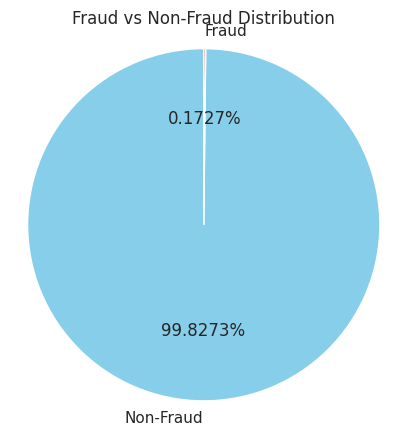

In [ ]:
labels = ['Non-Fraud', 'Fraud']
sizes = df['Class'].value_counts().sort_index()
colors = ['skyblue', 'salmon']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', colors=colors, startangle=90)
plt.title("Fraud vs Non-Fraud Distribution")
plt.axis('equal')
plt.show()

In [ ]:
# Minimum and Maximum Transaction Amount
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()

print(f"🔽 Minimum Transaction Amount: {min_amount:.2f}")
print(f"🔼 Maximum Transaction Amount: {max_amount:.2f}")

🔽 Minimum Transaction Amount: 0.00
🔼 Maximum Transaction Amount: 25691.16


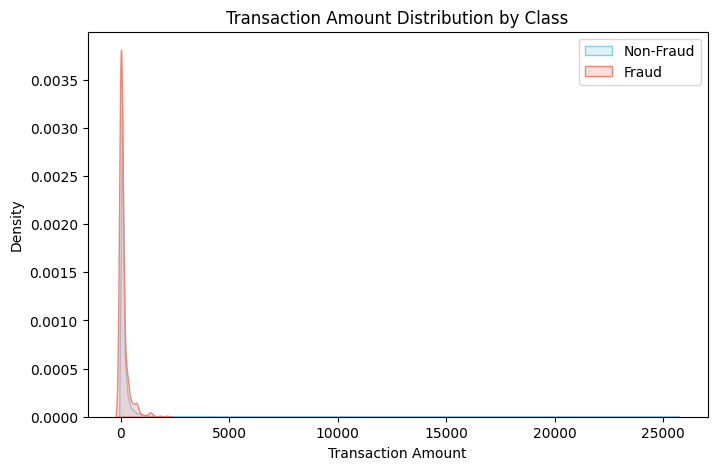

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', fill=True, color='skyblue')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', fill=True, color='salmon')
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
# Optional: limit for clarity (fraud amounts often < 2000)
plt.xlim(0, 2000)  # or just remove this line to auto-scale
plt.legend()
plt.show()

# Logistic Regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Prepare data
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Random Oversampling
ros = RandomOverSampler(random_state=1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Fit logistic regression directly (without GridSearchCV)
model = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred1 = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred1, target_names=["Legit", "Fraud"]))

Logistic Regression Accuracy: 0.977599101155156

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

       Legit       1.00      0.98      0.99     85295
       Fraud       0.07      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



# Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Prepare data
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define and train Decision Tree model (manual hyperparameter tuning)
model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred2 = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred2, target_names=["Legit", "Fraud"]))

Decision Tree Accuracy: 0.9970038505202299

Classification Report (Decision Tree):
               precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     85295
       Fraud       0.34      0.77      0.47       148

    accuracy                           1.00     85443
   macro avg       0.67      0.88      0.73     85443
weighted avg       1.00      1.00      1.00     85443



# Neural Networks


In [ ]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import os

# Focal Loss Function
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt + K.epsilon()))
    return loss

# Prepare features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Oversample minority class
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Build deeper neural network with batch norm and dropout
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model with Focal Loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=focal_loss(), metrics=['accuracy'])

# Callbacks
checkpoint_path = "best_model.keras"
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=60,
    batch_size=1024,
    callbacks=[early_stop, model_checkpoint, reduce_lr],
    verbose=1
)

# Load best model
model.load_weights(checkpoint_path)

# Evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Output metrics
print("Final Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

Epoch 1/60
310/311 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9392 - loss: 0.0126
Epoch 1: val_loss improved from inf to 0.00591, saving model to best_model.keras
311/311 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9394 - loss: 0.0126 - val_accuracy: 0.9586 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 2/60
310/311 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9837 - loss: 0.0028
Epoch 2: val_loss improved from 0.00591 to 0.00160, saving model to best_model.keras
311/311 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9837 - loss: 0.0028 - val_accuracy: 0.9972 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 3/60
310/311 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9917 - loss: 0.0016
Epoch 3: val_loss improved from 0.00160 to 0.00062, saving model to best_model.keras
311/311 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9917 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 6.2347e-04 - learning_rate: 0.0010
Epoch 4/60
308/311 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - ac

# Best Model: Neural Network

* It offers the best trade-off between catching fraud and minimizing false
positives.

* Best f1-score

* Good precision and recall

* Excellent overall accuracy

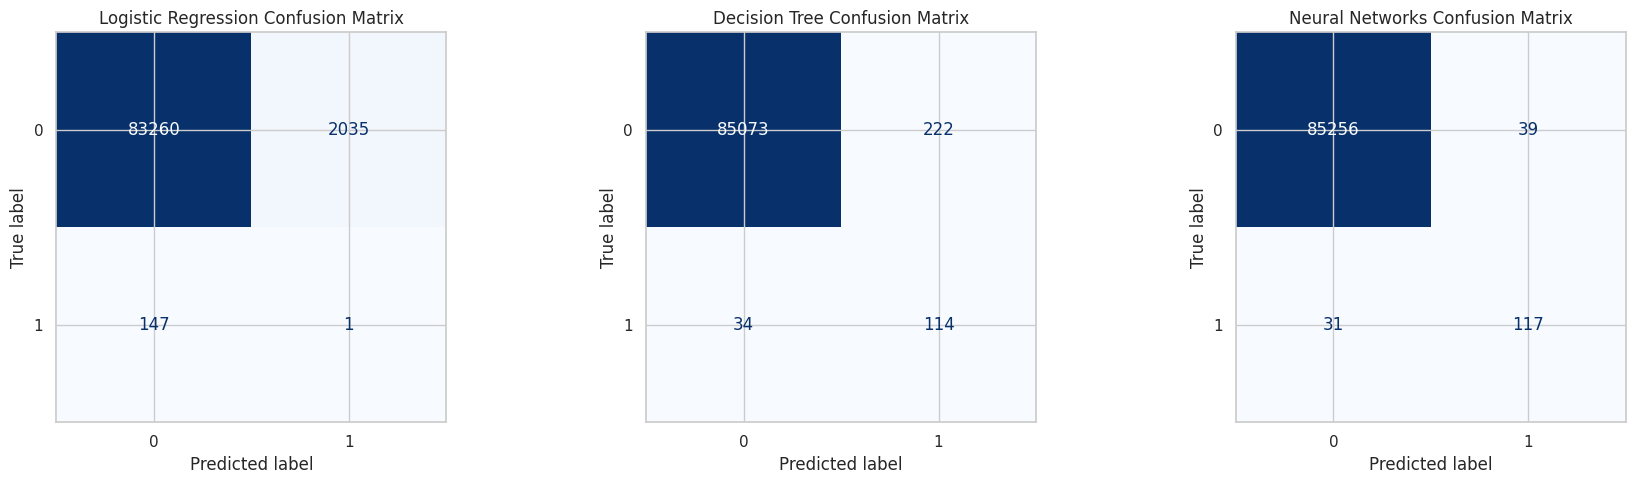

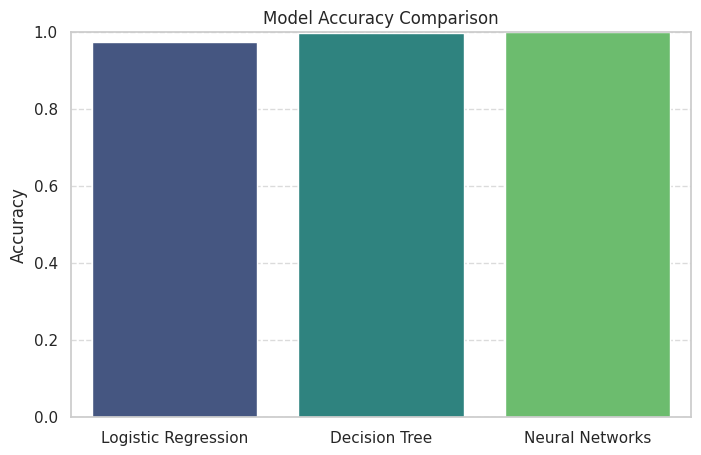

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

# Store predictions and names
model_preds = {
    'Logistic Regression': y_pred1,
    'Decision Tree': y_pred2,
    'Neural Networks': y_pred
}

# Accuracy scores
accuracies = {name: accuracy_score(y_test, y_pred) for name, y_pred in model_preds.items()}

# --- Plot Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
    ax.set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

# --- Plot Accuracy Comparison ---
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()